# Dataset EDA for Pre-Processing

In [1]:
import pandas as pd

Check on excessive zeros and verify original data remains uncorrupted from raw original. 


In [2]:
eda_df = pd.read_hdf(r'C:\Users\Linds\Repos\East_River\data\processed\east_river_engineered_features.h5')

In [3]:
org_scada_df = pd.read_csv(r'C:\Users\Linds\Repos\East_River\data\processed\Cleaned_SCADA_Data.csv')

In [4]:
org_weather_df = pd.read_json(r'C:\Users\Linds\Repos\East_River\data\processed\time_processed_weather.json')

In [5]:
shared_cols = eda_df.columns.intersection(org_weather_df.columns)
print("Shared columns between eda_df and org_weather_df:")
print(shared_cols.tolist())

Shared columns between eda_df and org_weather_df:
['location', 'datetime', 'temperature', 'wind_speed', 'wind_degree', 'precip', 'humidity', 'visibility', 'pressure', 'cloudcover', 'heatindex', 'windchill', 'windgust', 'feelslike', 'uv_index', 'obs_tms_lcl', 'wind_dir', 'weather_descriptions']


In [6]:
shared_cols_scada = eda_df.columns.intersection(org_scada_df.columns)
print("Shared columns between eda_df and org_scada_df:")
print(shared_cols_scada.tolist())

Shared columns between eda_df and org_scada_df:
['Unnamed: 0', 'Timestamp', 'OnLine_Load_MW', 'Load_Control_KW', 'Load_Control_MW', 'Estimated_Online_Load_Control_MW', 'Control_Threshold_MW']


In [7]:
# ensure that the Timestamp columns are in the same datetime format/timezone
org_scada_df['Timestamp'] = pd.to_datetime(org_scada_df['Timestamp']).dt.tz_localize('UTC')
eda_df['Timestamp'] = pd.to_datetime(eda_df['Timestamp'])

# merge the two dataframes on 'Timestamp' using only the shared SCADA columns from eda_df
common_cols = ['Timestamp', 'OnLine_Load_MW', 'Load_Control_KW', 'Load_Control_MW',
               'Estimated_Online_Load_Control_MW', 'Control_Threshold_MW']
merged_df = org_scada_df.merge(eda_df[common_cols], on='Timestamp', suffixes=('_scada', '_eda'))

# compare each column from SCADA with the corresponding one from eda_df
cols_to_check = ['OnLine_Load_MW', 'Load_Control_KW', 'Load_Control_MW',
                 'Estimated_Online_Load_Control_MW', 'Control_Threshold_MW']

for col in cols_to_check:
    same = merged_df[f"{col}_scada"].equals(merged_df[f"{col}_eda"])
    print(f"{col} matches:", same)

OnLine_Load_MW matches: True
Load_Control_KW matches: True
Load_Control_MW matches: True
Estimated_Online_Load_Control_MW matches: True
Control_Threshold_MW matches: True


In [8]:
cols_to_check = ['OnLine_Load_MW', 'Load_Control_KW', 'Load_Control_MW',
                 'Estimated_Online_Load_Control_MW', 'Control_Threshold_MW']

for col in cols_to_check:
    full_match = merged_df[f"{col}_scada"].equals(merged_df[f"{col}_eda"])
    print(f"{col} full match: {full_match}")

OnLine_Load_MW full match: True
Load_Control_KW full match: True
Load_Control_MW full match: True
Estimated_Online_Load_Control_MW full match: True
Control_Threshold_MW full match: True


In [9]:
eda_df = eda_df.sort_values(['location', 'datetime'])

In [10]:
eda_df.head()

,location,datetime,temperature,wind_speed,wind_degree,precip,humidity,visibility,pressure,cloudcover,...,day_of_year,day_of_year_sin,day_of_year_cos,local_date,prev_day_peak,prev_day_avg,iso_week,prev_week_peak,temp_humidity_interaction,wind_precip_interaction
0,"Aberdeen, South Dakota",2020-12-31 06:00:00+00:00,12.0,7.0,197.0,0.0,90.0,6.0,30.120,69.0,...,366,0.017213,0.999852,2020-12-31,NaN,NaN,53,NaN,1080.0,0.0
225,"Aberdeen, South Dakota",2020-12-31 06:30:00+00:00,11.0,7.0,196.0,0.0,90.0,6.0,30.105,61.0,...,366,0.017213,0.999852,2020-12-31,NaN,NaN,53,NaN,990.0,0.0
441,"Aberdeen, South Dakota",2020-12-31 07:00:00+00:00,10.0,7.0,195.0,0.0,90.0,6.0,30.090,53.0,...,366,0.017213,0.999852,2020-12-31,NaN,NaN,53,NaN,900.0,0.0
660,"Aberdeen, South Dakota",2020-12-31 07:30:00+00:00,10.0,7.0,194.0,0.0,89.5,6.0,30.090,45.5,...,366,0.017213,0.999852,2020-12-31,NaN,NaN,53,NaN,895.0,0.0
763,"Aberdeen, South Dakota",2020-12-31 08:00:00+00:00,10.0,7.0,193.0,0.0,89.0,6.0,30.090,38.0,...,366,0.017213,0.999852,2020-12-31,NaN,NaN,53,NaN,890.0,0.0


In [11]:
org_weather_df.head()

,location,datetime,temperature,wind_speed,wind_degree,precip,humidity,visibility,pressure,cloudcover,heatindex,dewpoint,windchill,windgust,feelslike,uv_index,obs_tms_lcl,wind_dir,weather_descriptions
0,"Aberdeen, South Dakota",2020-12-31 06:00:00+00:00,12.0,7.0,197.0,0.0,90.0,6.0,30.120,69.0,12.0,9.0,0.0,15.0,0.0,1.0,2020-12-31T06:00:00.000Z,SSW,Cloudy
1,"Aberdeen, South Dakota",2020-12-31 06:30:00+00:00,11.0,7.0,196.0,0.0,90.0,6.0,30.105,61.0,11.0,9.0,0.0,15.5,0.0,1.0,2020-12-31T06:00:00.000Z,SSW,Cloudy
2,"Aberdeen, South Dakota",2020-12-31 07:00:00+00:00,10.0,7.0,195.0,0.0,90.0,6.0,30.090,53.0,10.0,9.0,0.0,16.0,0.0,1.0,2020-12-31T07:00:00.000Z,SSW,Partly cloudy
3,"Aberdeen, South Dakota",2020-12-31 07:30:00+00:00,10.0,7.0,194.0,0.0,89.5,6.0,30.090,45.5,10.0,9.0,0.0,16.0,0.0,1.0,2020-12-31T07:00:00.000Z,SSW,Partly cloudy
4,"Aberdeen, South Dakota",2020-12-31 08:00:00+00:00,10.0,7.0,193.0,0.0,89.0,6.0,30.090,38.0,10.0,9.0,0.0,16.0,0.0,1.0,2020-12-31T08:00:00.000Z,SSW,Partly cloudy


Missing Values

In [12]:
print(eda_df.isnull().sum().to_string())

location                                  0
datetime                                  0
temperature                               0
wind_speed                                0
wind_degree                               0
precip                                    0
humidity                                  0
visibility                                0
pressure                                  0
cloudcover                                0
heatindex                                 0
windchill                                 0
windgust                                  0
feelslike                                 0
uv_index                                  0
obs_tms_lcl                               0
wind_dir                                  0
weather_descriptions                      0
temperature_2m                            0
precipitation                             0
snowfall                                  0
snow_depth                                0
apparent_temperature            

Zero Values

In [13]:
zero_counts = (eda_df == 0).sum().to_string()
print("Zero counts per column in eda_df:")
print(zero_counts)

Zero counts per column in eda_df:
location                                   0
datetime                                   0
temperature                            40220
wind_speed                              1203
wind_degree                             4465
precip                              11896377
humidity                                   0
visibility                            262927
pressure                                   0
cloudcover                            835753
heatindex                              40227
windchill                              64114
windgust                                 264
feelslike                              64114
uv_index                                   0
obs_tms_lcl                                0
wind_dir                                   0
weather_descriptions                       0
temperature_2m                         31494
precipitation                       11086236
snowfall                            11778408
snow_depth           

# Audit Zeros for validation

Weather

In [14]:
eda_df.groupby('hour')[['temperature', 
                          'global_tilted_irradiance', 
                          'diffuse_radiation', 
                          'direct_radiation', 
                          'wind_speed']].mean()

,temperature,global_tilted_irradiance,diffuse_radiation,direct_radiation,wind_speed
hour,,,,,
0,44.651161,0.000000,0.000000,0.000000,9.459360
1,43.909293,1.505647,0.909993,0.595654,9.402782
2,43.244540,15.826738,8.013593,7.813145,9.338513
3,42.575202,69.465340,29.385209,40.080130,9.284729
4,42.084163,177.168325,63.946465,113.221860,9.237556
5,41.768137,314.149623,99.200412,214.949211,9.191834
6,41.961314,441.552505,125.174502,316.378003,9.195439
7,42.822405,533.832018,144.312800,389.519218,9.353045
8,44.233855,583.624571,154.753089,428.871482,9.675166


Temperature, radiance and wind speed by hour appear to have normal distribution.

In [15]:
for feature in ['precip', 'precipitation', 'blended_precip']:
    zero_count = (eda_df[feature] == 0).sum()
    total = eda_df.shape[0]
    zero_pct = (zero_count / total) * 100
    print(f"{feature}: {zero_count} zeros ({zero_pct:.2f}% of total records)")

precip: 11896377 zeros (97.76% of total records)
precipitation: 11086236 zeros (91.10% of total records)
blended_precip: 10911890 zeros (89.67% of total records)


These numbers can be normal. In high-resolution data (e.g., hourly or half-hourly), it's common to see the vast majority of records without precipitation—even in places like South Dakota. However, it’s a good idea to check with local climatological data to ensure these percentages align with expectations for your dataset.

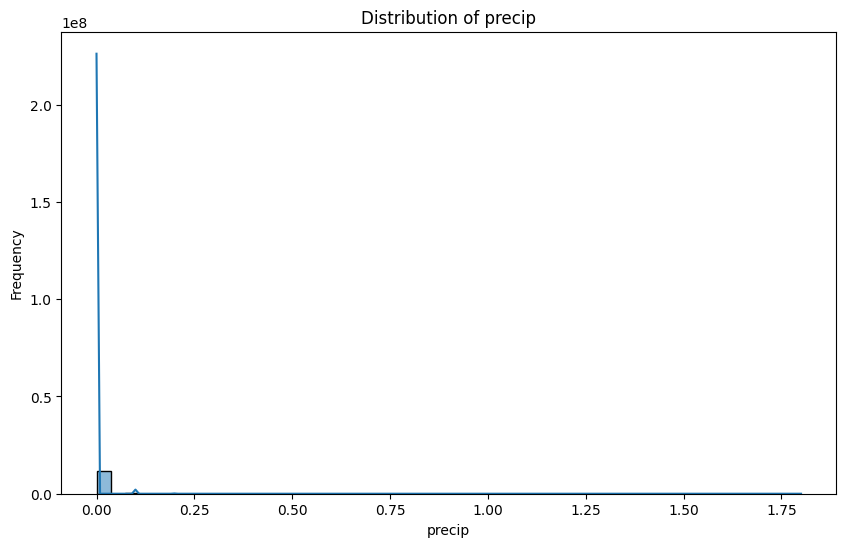

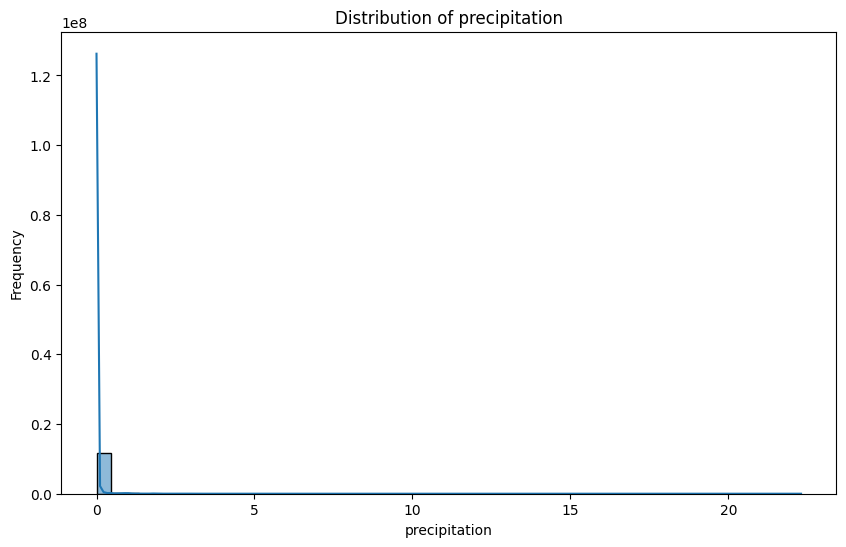

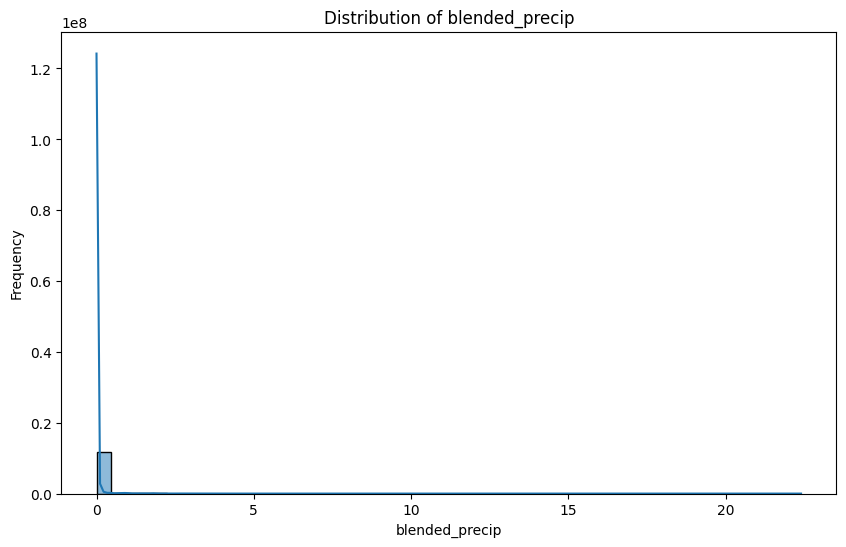

In [16]:
import seaborn as sns

import matplotlib.pyplot as plt

features_to_plot = ['precip', 'precipitation', 'blended_precip']

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(eda_df[feature].dropna(), kde=True, bins=50)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

Mean Precipitation by Month:
datetime
1     0.017344
2     0.023099
3     0.048536
4     0.108410
5     0.109776
6     0.083269
7     0.072465
8     0.070847
9     0.064178
10    0.051247
11    0.027310
12    0.047674
Name: blended_precip, dtype: float64


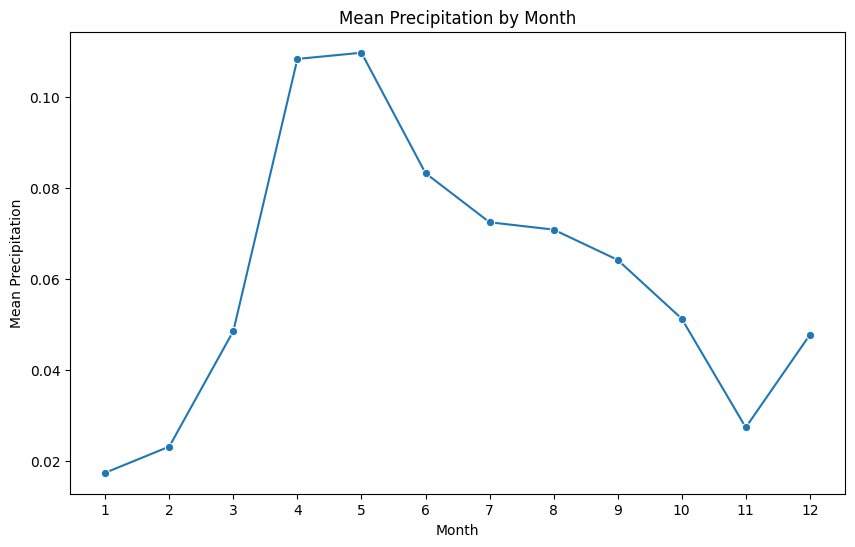

In [18]:
# Calculate the mean precipitation for each month
precip_by_month = eda_df.groupby(eda_df['datetime'].dt.month)['blended_precip'].mean()
print("Mean Precipitation by Month:")
print(precip_by_month)

# Plot the seasonal pattern
plt.figure(figsize=(10, 6))
sns.lineplot(x=precip_by_month.index, y=precip_by_month.values, marker='o')
plt.title("Mean Precipitation by Month")
plt.xlabel("Month")
plt.ylabel("Mean Precipitation")
plt.xticks(range(1, 13))
plt.show()

Create Weather Event Feature

In [19]:
# Define a wind speed threshold (adjust as needed)
wind_threshold = 20  # example threshold for high winds

def detect_weather_event(row):
    description = row.get('weather_descriptions', '')
    description_lower = description.lower() if isinstance(description, str) else ""
    # Check for storm-related keywords
    if any(keyword in description_lower for keyword in ["storm", "thunder", "tornado", "hurricane"]):
        return "storm"
    # Check for high wind speed event
    elif row.get('wind_speed', 0) >= wind_threshold:
        return "high_wind"
    else:
        return "normal"

# Add the weather event column
eda_df['weather_event'] = eda_df.apply(detect_weather_event, axis=1)
print(eda_df[['weather_descriptions', 'wind_speed', 'weather_event']].head())

    weather_descriptions  wind_speed weather_event
0                 Cloudy         7.0        normal
225               Cloudy         7.0        normal
441        Partly cloudy         7.0        normal
660        Partly cloudy         7.0        normal
763        Partly cloudy         7.0        normal


Summary statistics for temperature columns:
        temperature  apparent_temperature  temperature_2m
count  1.216869e+07          1.216869e+07    1.216869e+07
mean   4.814735e+01          6.574075e+00    9.976492e+00
std    2.374325e+01          1.488709e+01    1.281771e+01
min   -3.100000e+01         -3.980000e+01   -3.020000e+01
25%    3.000000e+01         -5.150000e+00    5.000000e-02
50%    4.900000e+01          6.050000e+00    1.020000e+01
75%    6.700000e+01          1.935000e+01    2.055000e+01
max    1.130000e+02          4.130000e+01    3.990000e+01


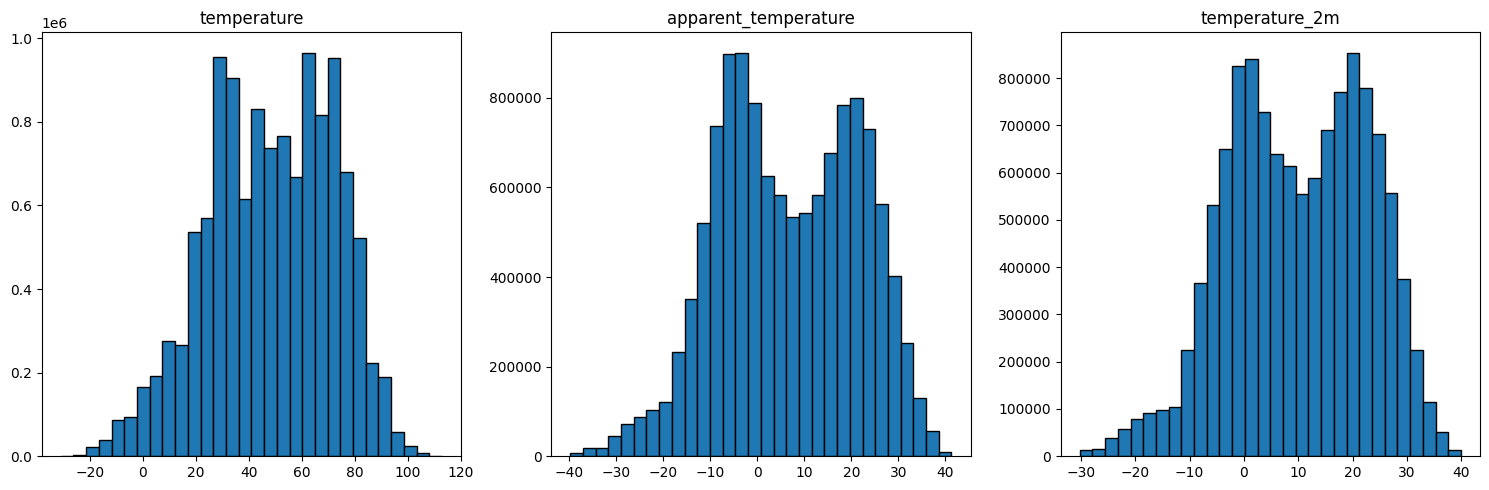

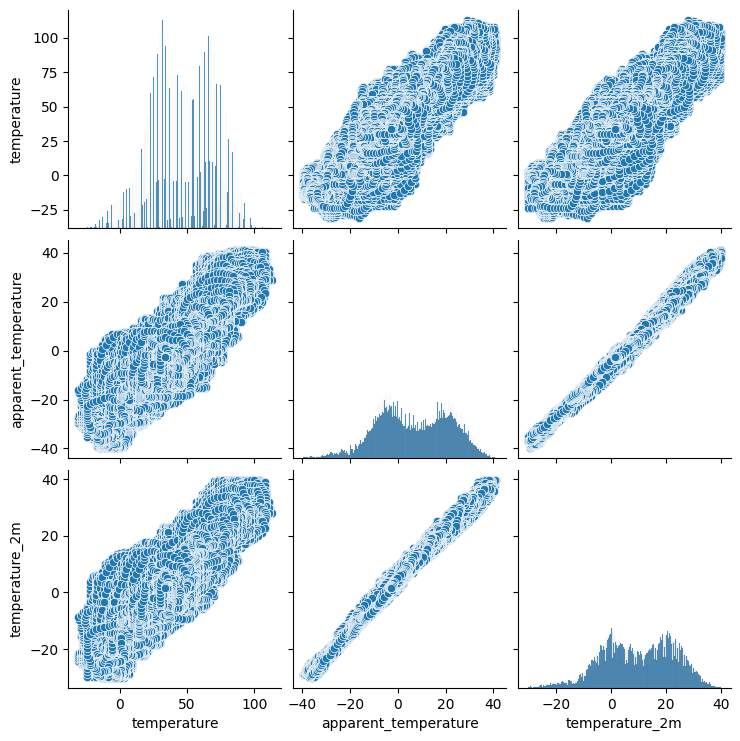

In [20]:
# Summary statistics for the suspected temperature columns
print("Summary statistics for temperature columns:")
print(eda_df[['temperature', 'apparent_temperature', 'temperature_2m']].describe())

# Plot histograms for each temperature column
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for col, ax in zip(['temperature', 'apparent_temperature', 'temperature_2m'], axes):
    ax.hist(eda_df[col].dropna(), bins=30, edgecolor='k')
    ax.set_title(col)
plt.tight_layout()
plt.show()

# Plot pairwise relationships between the temperature columns
sns.pairplot(eda_df[['temperature', 'apparent_temperature', 'temperature_2m']].dropna())
plt.show()

The summary statistics and plots indicate that the three temperature measurements (e.g., temperature, apparent_temperature, temperature_2m) are quite similar in terms of range and central tendency. The histograms show that all three features roughly follow a unimodal distribution with comparable spreads, and the pairwise plots suggest a strong correlation between them. This implies that these features might be conveying similar information and could be redundant, though any slight differences might be useful for capturing calibration differences or environmental effects.

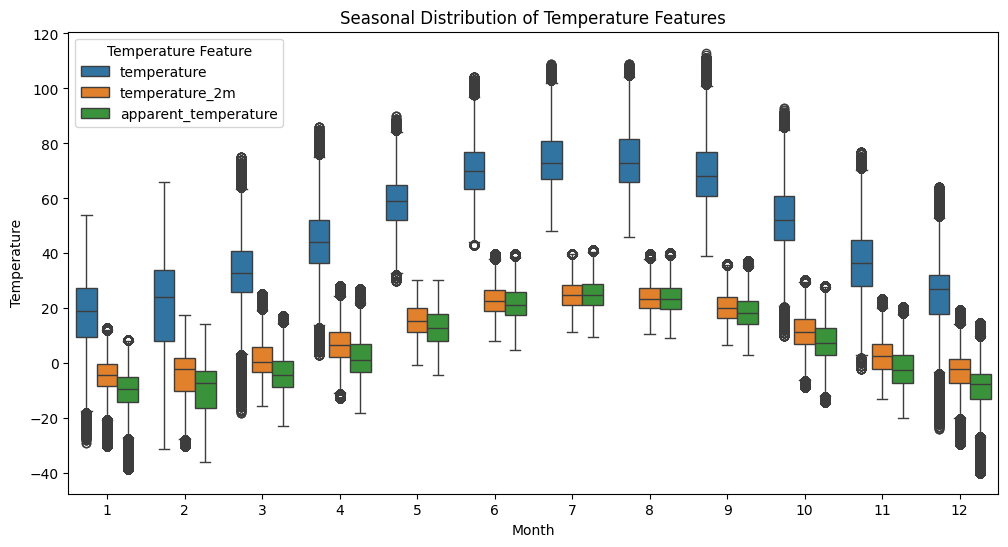

In [21]:
# Create a melted dataframe for temperature features for easier plotting
temp_features = ['temperature', 'temperature_2m', 'apparent_temperature']
temp_df = eda_df.melt(id_vars='month', value_vars=temp_features, 
                      var_name='temp_feature', value_name='value')

# Plot seasonal distribution of temperature features
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='value', hue='temp_feature', data=temp_df)
plt.title('Seasonal Distribution of Temperature Features')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.legend(title='Temperature Feature')
plt.show()

The box plot shows the seasonal distribution for the three temperature measures (temperature, temperature_2m, and apparent_temperature). It reveals that their medians, interquartile ranges, and overall spreads are quite similar across months, suggesting that these features are capturing similar information. Any subtle differences might indicate calibration or environmental effects, but overall the seasonal trends are consistent between them.

Based on the seasonal distributions seen in the box plots, the temperature ranges (including both high and low values) seem consistent with what we would expect for South Dakota. Winter lows in the data (with values around or below freezing) and higher summer measures align with regional climatology, though you might want to double‐check against local climatological records for complete validation.

In [22]:
eda_df['was_controlled'] = (eda_df['Load_Control_MW'] > 0).astype(int)
print(eda_df[['Load_Control_MW', 'was_controlled']].head())

     Load_Control_MW  was_controlled
0           5.077996               1
225         5.077996               1
441         5.077996               1
660         5.077996               1
763         5.077996               1


For a 24‑hr to 72‑hr forecast window you can leverage both historical load data and weather features.

LOAD FEATURES:
• OnLine_Load_MW, Load_Control_KW, Load_Control_MW, Estimated_Online_Load_Control_MW, Control_Threshold_MW
 • Lag features (load_lag_1, load_lag_2, load_lag_3) and load difference/rolling statistics (e.g. load_diff_24hr,
   load_lag_3_rolling_mean_24hrs, load_lag_3_rolling_std_24hrs) to capture recent trends.

WEATHER FEATURES:
 • Temperature measurements: temperature, temperature_2m, apparent_temperature
 • Precipitation variables: precip, precipitation, blended_precip, snowfall, snow_depth
  • Other meteorological indicators: wind_speed, wind_degree, humidity, cloudcover, pressure, uv_index,
   windchill, windgust
 • Derived features like weather_event to flag special conditions (e.g., storms, high winds)

TIME FEATURES:
 • Temporal components such as hour, day, month, day_of_week (and related cyclical transformations)

 These features together can help the model capture the influence of meteorology and historical load trends when forecasting the 24‑hr to 72‑hr window.

Audit Columns

In [23]:
# Print the dataframe summary
print("EDA DataFrame Info:")
eda_df.info()

print("\nEDA DataFrame Description:")
print(eda_df.describe(include='all'))

# Identify columns with constant values (or extremely low variance)
low_variance_cols = [col for col in eda_df.columns if eda_df[col].nunique() <= 1]
print("\nColumns with constant (or suspiciously low variance) values:")
print(low_variance_cols)

# Check for duplicate values in key columns
datetime_duplicates = eda_df['datetime'].duplicated().sum()
temperature_duplicates = eda_df['temperature'].duplicated().sum()

print(f"\nNumber of duplicate 'datetime' entries: {datetime_duplicates}")
print(f"Number of duplicate 'temperature' entries: {temperature_duplicates}")

EDA DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 12168690 entries, 0 to 12168689
Data columns (total 93 columns):
 #   Column                            Dtype                          
---  ------                            -----                          
 0   location                          object                         
 1   datetime                          datetime64[ns, UTC]            
 2   temperature                       float64                        
 3   wind_speed                        float64                        
 4   wind_degree                       float64                        
 5   precip                            float64                        
 6   humidity                          float64                        
 7   visibility                        float64                        
 8   pressure                          float64                        
 9   cloudcover                        float64                        
 10  heatindex    

In [24]:
eda_df.info()
print(eda_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 12168690 entries, 0 to 12168689
Data columns (total 93 columns):
 #   Column                            Dtype                          
---  ------                            -----                          
 0   location                          object                         
 1   datetime                          datetime64[ns, UTC]            
 2   temperature                       float64                        
 3   wind_speed                        float64                        
 4   wind_degree                       float64                        
 5   precip                            float64                        
 6   humidity                          float64                        
 7   visibility                        float64                        
 8   pressure                          float64                        
 9   cloudcover                        float64                        
 10  heatindex                        

In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

print(eda_df.head(5))

                   location                  datetime  temperature  \
0    Aberdeen, South Dakota 2020-12-31 06:00:00+00:00         12.0   
225  Aberdeen, South Dakota 2020-12-31 06:30:00+00:00         11.0   
441  Aberdeen, South Dakota 2020-12-31 07:00:00+00:00         10.0   
660  Aberdeen, South Dakota 2020-12-31 07:30:00+00:00         10.0   
763  Aberdeen, South Dakota 2020-12-31 08:00:00+00:00         10.0   

     wind_speed  wind_degree  precip  humidity  visibility  pressure  \
0           7.0        197.0     0.0      90.0         6.0    30.120   
225         7.0        196.0     0.0      90.0         6.0    30.105   
441         7.0        195.0     0.0      90.0         6.0    30.090   
660         7.0        194.0     0.0      89.5         6.0    30.090   
763         7.0        193.0     0.0      89.0         6.0    30.090   

     cloudcover  heatindex  windchill  windgust  feelslike  uv_index  \
0          69.0       12.0        0.0      15.0        0.0       1.0   
22

Let's start removing unnecessary columns.

Time features

In [26]:
eda_df.drop(columns=['Unnamed: 0'], inplace=True)

In [27]:
# Check how many missing values are in the 'Timestamp' column
print("Missing values in 'Timestamp':", eda_df['Timestamp'].isnull().sum())

# If 'Timestamp' is entirely missing, drop it
if eda_df['Timestamp'].isnull().all():
    eda_df.drop(columns=['Timestamp'], inplace=True)
    print("'Timestamp' column dropped from eda_df.")
else:
    print("'Timestamp' contains valid values; not dropped.")

Missing values in 'Timestamp': 7656
'Timestamp' contains valid values; not dropped.


In [29]:
eda_df.drop(columns=['Timestamp'], inplace=True)
print("'Timestamp' column has been dropped from eda_df.")

'Timestamp' column has been dropped from eda_df.


In [30]:
cols_to_inspect = ['local_time', 'obs_tms_lcl', 'datetime', 'date', 'local_date', 'control_event_time', 'last_control_time']
missing_counts = eda_df[cols_to_inspect].isnull().sum()
print("Missing values in selected time-related columns:")
print(missing_counts)

Missing values in selected time-related columns:
local_time                  0
obs_tms_lcl                 0
datetime                    0
date                        0
local_date                  0
control_event_time    6944688
last_control_time           0
dtype: int64


In [31]:
cols_to_drop = ['obs_tms_lcl', 'date', 'local_date']
eda_df.drop(columns=[col for col in cols_to_drop if col in eda_df.columns], inplace=True)
print("Dropped columns:", cols_to_drop)

Dropped columns: ['obs_tms_lcl', 'date', 'local_date']


Weather features - redudant with others

In [32]:
eda_df.drop(columns=['precip', 'precipitation'], inplace=True)
print("Remaining precipitation feature:", 'blended_precip')

Remaining precipitation feature: blended_precip


In [33]:
# Examine the missing values in the specified columns
columns_to_check = ['control_event_time', 'prev_day_peak', 'prev_day_avg', 'prev_week_peak']

# Count the missing values per column
missing_counts = eda_df[columns_to_check].isnull().sum()
print("Missing values per column:")
print(missing_counts)

# Check the percentage of missing data in each column
total_records = eda_df.shape[0]
for col in columns_to_check:
    non_missing = eda_df[col].notnull().sum()
    missing_pct = ((total_records - non_missing) / total_records) * 100
    print(f"{col}: {missing_pct:.2f}% missing data.")

# Optional: Inspect a sample of the non-null values to understand their origin
for col in columns_to_check:
    sample_values = eda_df[col].dropna().unique()[:5]  # showing first few unique values
    print(f"Sample unique values from {col}: {sample_values}")

Missing values per column:
control_event_time    6944688
prev_day_peak            8352
prev_day_avg             8352
prev_week_peak           8352
dtype: int64
control_event_time: 57.07% missing data.
prev_day_peak: 0.07% missing data.
prev_day_avg: 0.07% missing data.
prev_week_peak: 0.07% missing data.
Sample unique values from control_event_time: <DatetimeArray>
['2020-12-31 00:00:00-06:00', '2020-12-31 00:30:00-06:00',
 '2020-12-31 01:00:00-06:00', '2020-12-31 01:30:00-06:00',
 '2020-12-31 02:00:00-06:00']
Length: 5, dtype: datetime64[ns, America/Chicago]
Sample unique values from prev_day_peak: [514.37   559.148  587.4167 551.568  558.55  ]
Sample unique values from prev_day_avg: [500.48185842 522.11304167 522.25421042 511.600125   507.93470833]
Sample unique values from prev_week_peak: [748.495 514.37  600.728 575.73  671.945]


In [34]:
eda_df.drop(columns=['control_event_time'], inplace=True)



Fill previous week/day values unavailable with median values for each column

In [35]:
for col in ['prev_day_peak', 'prev_day_avg', 'prev_week_peak']:
    eda_df[col] = eda_df[col].fillna(eda_df[col].median())





In [37]:

features = eda_df.columns.tolist()
print("List of features:")
print(features)
print("\nTotal number of features:", len(features))


List of features:
['location', 'datetime', 'temperature', 'wind_speed', 'wind_degree', 'humidity', 'visibility', 'pressure', 'cloudcover', 'heatindex', 'windchill', 'windgust', 'feelslike', 'uv_index', 'wind_dir', 'weather_descriptions', 'temperature_2m', 'snowfall', 'snow_depth', 'apparent_temperature', 'relative_humidity_2m', 'global_tilted_irradiance', 'diffuse_radiation', 'direct_radiation', 'pressure_msl', 'surface_pressure', 'blended_precip', 'latitude', 'longitude', 'noaa_station_name', 'OnLine_Load_MW', 'Load_Control_KW', 'Load_Control_MW', 'Estimated_Online_Load_Control_MW', 'Control_Threshold_MW', 'day_of_week', 'local_time', 'is_weekend', 'is_holiday', 'hour', 'minute', 'day', 'month', 'year', 'minutes_since_midnight', 'hour_sin', 'hour_cos', 'day_of_week_num', 'load_lag_1', 'load_lag_2', 'load_lag_3', 'load_lag_3_rolling_mean_3', 'load_lag_3_rolling_std_3', 'load_lag_3_rolling_mean_6', 'load_lag_3_rolling_std_6', 'load_lag_3_rolling_mean_12', 'load_lag_3_rolling_std_12', 'l

## Handling Fields with High Zero Proportions

In this step, we target numeric fields that have a large number of zeros, excluding fields related to temperature, precipitation, wind speed, and radiation (e.g. features with names containing "temp", "precip", "wind", "irradiance", or "radiation").

The strategy is to:
- Loop through all numeric columns.
- Skip any column whose name contains the excluded keywords.
- Compute the percentage of zero values in the remaining columns.
- Identify fields where the zero percentage exceeds a set threshold (e.g., 50%).

Based on these insights, we can decide whether to clean, impute, or even drop some of these fields during pre-processing.

In [38]:
import numpy as np
# Identify numeric fields with high zero proportions (excluding specific keywords)
excluded_keywords = ['temp', 'precip', 'wind', 'irradiance', 'radiation']
threshold = 50.0  # Threshold percentage

print("Numeric columns with high zero proportions (excluding specified keywords):")
for col in eda_df.select_dtypes(include=[np.number]).columns:
    # Skip columns whose names contain any of the excluded keywords
    if any(keyword in col.lower() for keyword in excluded_keywords):
        continue
    total = eda_df.shape[0]
    zero_count = (eda_df[col] == 0).sum()
    zero_pct = (zero_count / total) * 100
    if zero_pct > threshold:
        print(f"Column '{col}': {zero_count} zeros ({zero_pct:.2f}% of total records)")

Numeric columns with high zero proportions (excluding specified keywords):
Column 'snowfall': 11778408 zeros (96.79% of total records)
Column 'snow_depth': 9156576 zeros (75.25% of total records)
Column 'Load_Control_KW': 6944688 zeros (57.07% of total records)
Column 'Load_Control_MW': 6944688 zeros (57.07% of total records)
Column 'minute': 6084432 zeros (50.00% of total records)
Column 'load_lag_3_rolling_std_3': 12029029 zeros (98.85% of total records)
Column 'load_lag_3_rolling_std_6': 11819539 zeros (97.13% of total records)
Column 'load_lag_3_rolling_std_12': 11400559 zeros (93.69% of total records)
Column 'load_diff_1': 12098859 zeros (99.43% of total records)
Column 'load_diff_24hr': 8816802 zeros (72.45% of total records)
Column 'load_lag_3_rolling_std_6hrs': 11400559 zeros (93.69% of total records)
Column 'load_lag_3_rolling_std_24hrs': 8886679 zeros (73.03% of total records)
Column 'was_controlled': 6944688 zeros (57.07% of total records)


In [ ]:

print("Overall zero percentage: {:.2f}%".format(zero_pct))

Overall zero percentage: 57.07%


Will get feedback the usefullness of these features with high zero counts in the next step

The high zero counts across many numeric fields could be due to several factors:

 1. In control data (e.g., Load_Control_MW), zeros might indicate no control action or instability in 
    the measurement, so these zeros are expected under normal operating conditions and would impact other features.

 2. Lag features and load differences are derived from previous load data. When the load remains constant or changes minimally between observations (or if the sampling frequency doesn't capture fluctuations), the computed lag values and differences will be zero.

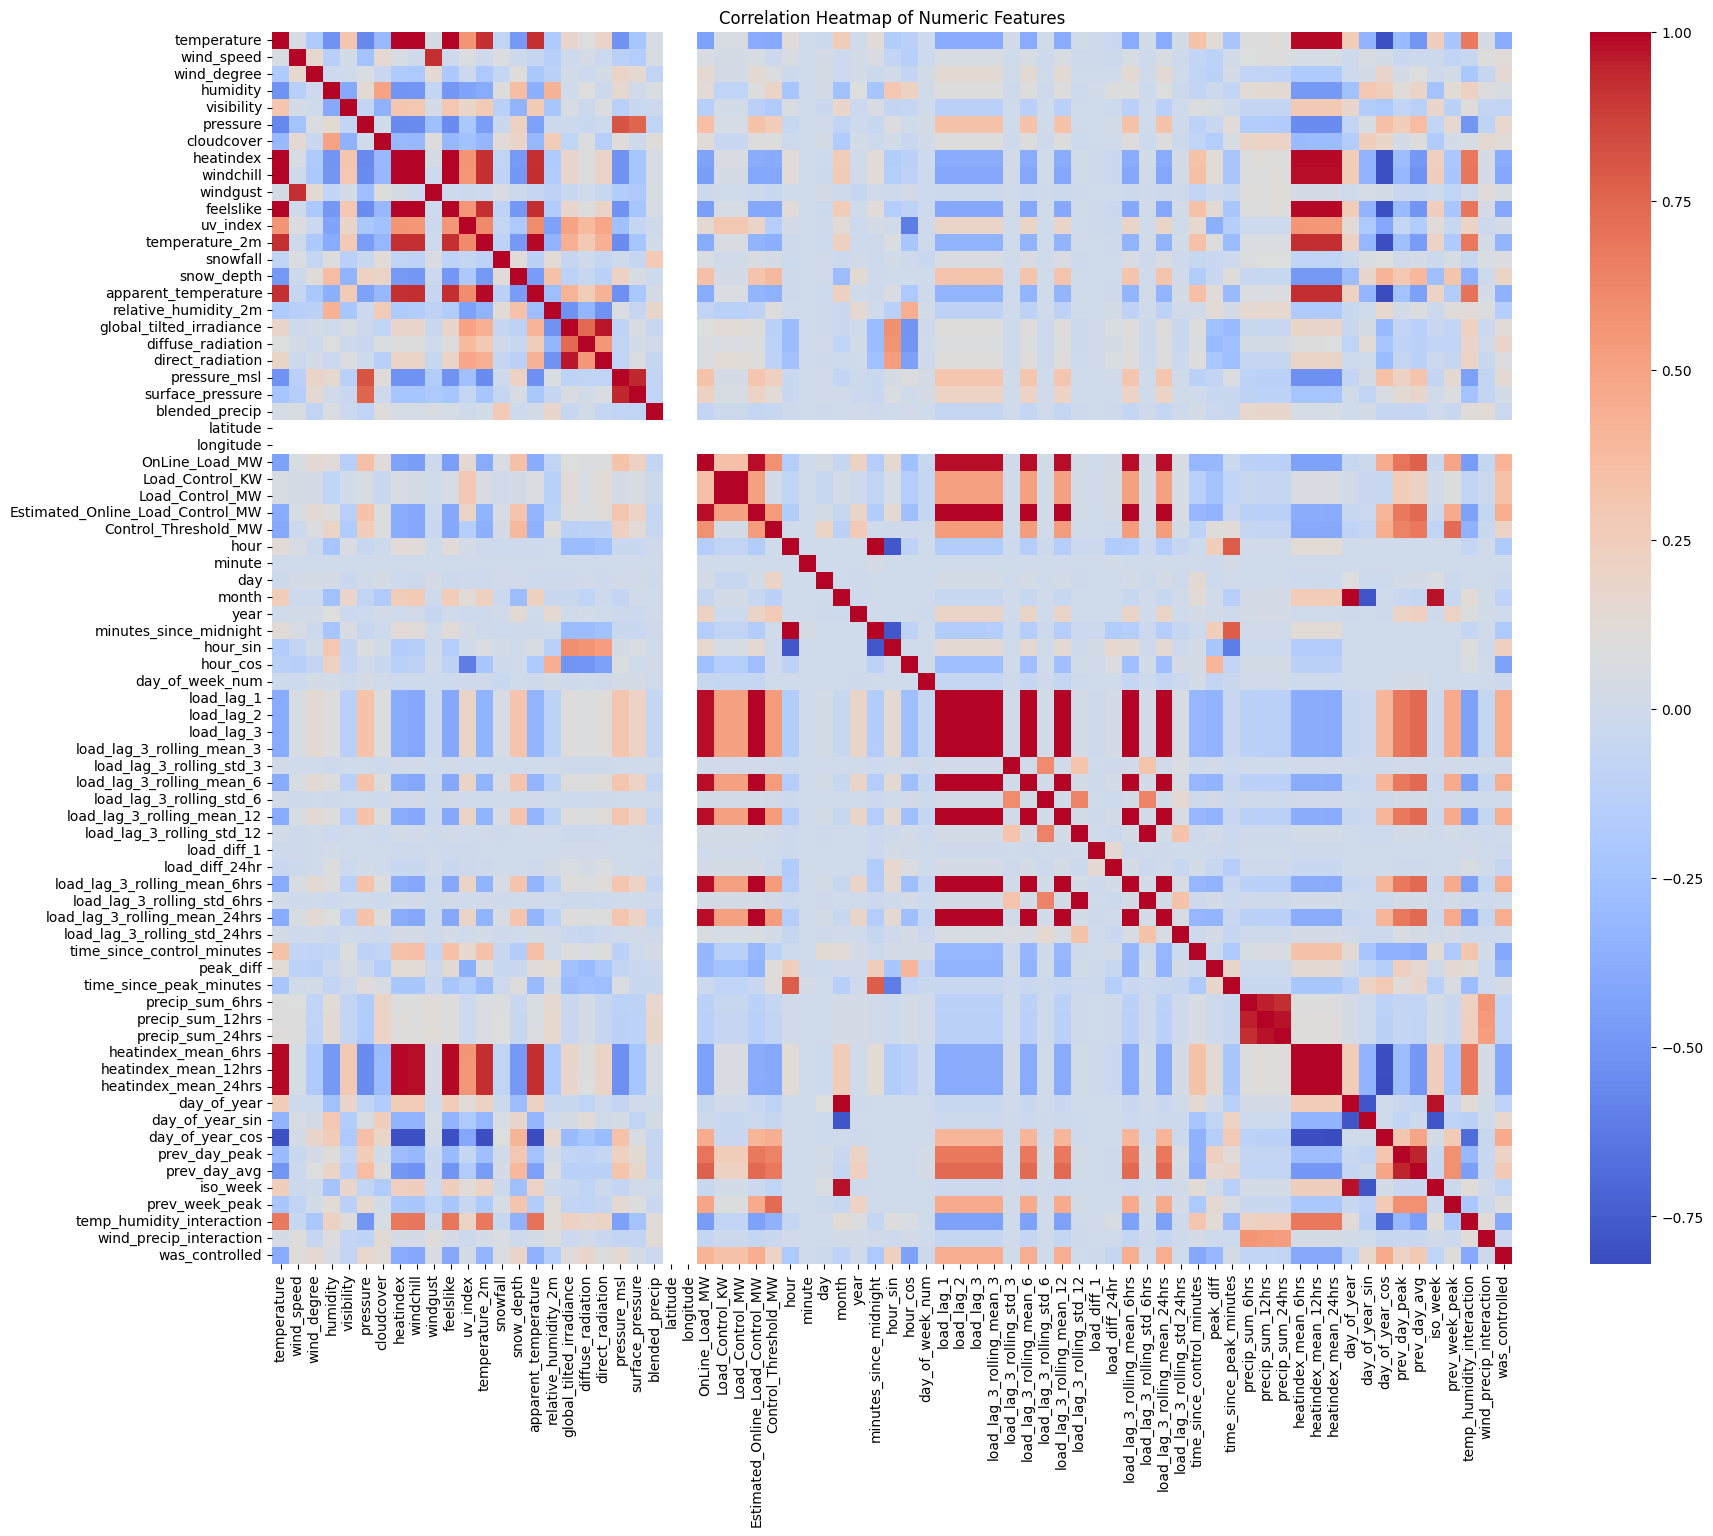

Highly correlated feature pairs (|corr| > 0.9):
temperature and heatindex: correlation = 1.00
temperature and windchill: correlation = 1.00
temperature and feelslike: correlation = 1.00
temperature and temperature_2m: correlation = 0.92
temperature and apparent_temperature: correlation = 0.92
temperature and heatindex_mean_6hrs: correlation = 0.99
temperature and heatindex_mean_12hrs: correlation = 0.99
temperature and heatindex_mean_24hrs: correlation = 0.99
wind_speed and windgust: correlation = 0.92
heatindex and windchill: correlation = 0.99
heatindex and feelslike: correlation = 1.00
heatindex and temperature_2m: correlation = 0.92
heatindex and apparent_temperature: correlation = 0.92
heatindex and heatindex_mean_6hrs: correlation = 0.99
heatindex and heatindex_mean_12hrs: correlation = 0.99
heatindex and heatindex_mean_24hrs: correlation = 0.99
windchill and feelslike: correlation = 1.00
windchill and temperature_2m: correlation = 0.92
windchill and apparent_temperature: correla

c:\Users\Linds\anaconda3\envs\load_forecasting_env\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



Variance Inflation Factor (VIF) for numeric features:
                                           VIF
Load_Control_MW                            inf
Estimated_Online_Load_Control_MW           inf
Load_Control_KW                            inf
load_diff_1                                inf
hour                                       inf
...                                        ...
load_lag_3_rolling_std_24hrs      1.321947e+00
snowfall                          1.164072e+00
day_of_week_num                   1.151118e+00
longitude                         1.671817e-12
latitude                          3.048853e-13

[73 rows x 1 columns]


In [40]:
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Analyze multicollinearity and feature redundancy

import matplotlib.pyplot as plt

# Compute correlation matrix for numeric columns
numeric_cols = eda_df.select_dtypes(include=[np.number]).columns
corr_matrix = eda_df[numeric_cols].corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Identify highly correlated pairs (correlation coefficient greater than 0.9 in absolute value)
threshold = 0.9
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))
            
print("Highly correlated feature pairs (|corr| > 0.9):")
for feature1, feature2, corr_val in high_corr_pairs:
    print(f"{feature1} and {feature2}: correlation = {corr_val:.2f}")

# Calculate Variance Inflation Factor (VIF) for the numeric features
# Sampling a subset for speed when working with a large dataframe (adjust sample size if needed)
sample_df = eda_df[numeric_cols].dropna().sample(n=1000, random_state=42)

vif_data = {}
for i, col in enumerate(sample_df.columns):
    vif = variance_inflation_factor(sample_df.values, i)
    vif_data[col] = vif

vif_df = pd.DataFrame.from_dict(vif_data, orient='index', columns=['VIF']).sort_values(by='VIF', ascending=False)
print("\nVariance Inflation Factor (VIF) for numeric features:")
print(vif_df)

Based on our data exploration results, the following features are clearly not informative 
for predicting the OnLine_Load_MW and Estimated_Online_Load_Control_MW:

1. The low‐variance geographic fields:
      • "latitude"
      • "longitude"
      • "noaa_station_name"

 2. Weather precipitation features that suffer from a very high proportion of zeros:
      • "precip"
      • "precipitation"

 (Note: Many load‐derived lag/rolling features also show extreme collinearity with our targets,
 so extra caution should be taken when including them in a model.)

 These features do not add predictive power and can be removed from the modeling process.

In [41]:

print("Features not helpful for prediction include:")
print(["latitude", "longitude", "noaa_station_name", "precip", "precipitation"])

Features not helpful for prediction include:
['latitude', 'longitude', 'noaa_station_name', 'precip', 'precipitation']


In [42]:
print('precip' in eda_df.columns)
print('precipitation' in eda_df.columns)

False
False


keep one representative temperature measure (for example, temperature) and remove the others.

several lag/load-derived features show near‐perfect collinearity. may consider dropping some of the lag features or redundant load control measures if they do not contribute unique information.

non-informative fields such as latitude, longitude, and noaa_station_name were flagged as redundant, but might be helpful in streaming forecast.


In [43]:
#
columns_to_remove = ['temperature_2m', 'apparent_temperature'] # Remove the redundant temperature features
eda_df.drop(columns=columns_to_remove, inplace=True)

In [44]:
# Compute rolling statistics for load_lag_1.
# Adjust the window sizes (e.g., 12 for 6 hours and 48 for 24 hours if data is at 30‐minute intervals)
eda_df = eda_df.sort_values(['location', 'datetime'])
eda_df['load_lag_1_rolling_mean_6hrs'] = eda_df.groupby('location')['load_lag_1'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())
eda_df['load_lag_1_rolling_std_6hrs']  = eda_df.groupby('location')['load_lag_1'].transform(lambda x: x.rolling(window=12, min_periods=1).std())
eda_df['load_lag_1_rolling_mean_24hrs'] = eda_df.groupby('location')['load_lag_1'].transform(lambda x: x.rolling(window=48, min_periods=1).mean())
eda_df['load_lag_1_rolling_std_24hrs']  = eda_df.groupby('location')['load_lag_1'].transform(lambda x: x.rolling(window=48, min_periods=1).std())

print("Added rolling statistics for load_lag_1:")
print(eda_df[['load_lag_1', 'load_lag_1_rolling_mean_6hrs', 'load_lag_1_rolling_std_6hrs',
              'load_lag_1_rolling_mean_24hrs', 'load_lag_1_rolling_std_24hrs']].head())

Added rolling statistics for load_lag_1:
     load_lag_1  load_lag_1_rolling_mean_6hrs  load_lag_1_rolling_std_6hrs  \
0    500.291922                    500.291922                          NaN   
225  500.291922                    500.291922                          0.0   
441  500.291922                    500.291922                          0.0   
660  500.291922                    500.291922                          0.0   
763  500.291922                    500.291922                          0.0   

     load_lag_1_rolling_mean_24hrs  load_lag_1_rolling_std_24hrs  
0                       500.291922                           NaN  
225                     500.291922                           0.0  
441                     500.291922                           0.0  
660                     500.291922                           0.0  
763                     500.291922                           0.0  


In [46]:
if 'peak_time' in eda_df.columns:
    eda_df.drop(columns=['peak_time'], inplace=True)
    print("'peak_time' column dropped from eda_df.")
else:
    print("'peak_time' column not found in eda_df.")

'peak_time' column dropped from eda_df.


In [47]:
features = eda_df.columns.tolist()
print("List of features:")
print(features)
print("\nTotal number of features:", len(features))

List of features:
['location', 'datetime', 'temperature', 'wind_speed', 'wind_degree', 'humidity', 'visibility', 'pressure', 'cloudcover', 'heatindex', 'windchill', 'windgust', 'feelslike', 'uv_index', 'wind_dir', 'weather_descriptions', 'snowfall', 'snow_depth', 'relative_humidity_2m', 'global_tilted_irradiance', 'diffuse_radiation', 'direct_radiation', 'pressure_msl', 'surface_pressure', 'blended_precip', 'latitude', 'longitude', 'noaa_station_name', 'OnLine_Load_MW', 'Load_Control_KW', 'Load_Control_MW', 'Estimated_Online_Load_Control_MW', 'Control_Threshold_MW', 'day_of_week', 'local_time', 'is_weekend', 'is_holiday', 'hour', 'minute', 'day', 'month', 'year', 'minutes_since_midnight', 'hour_sin', 'hour_cos', 'day_of_week_num', 'load_lag_1', 'load_lag_2', 'load_lag_3', 'load_lag_3_rolling_mean_3', 'load_lag_3_rolling_std_3', 'load_lag_3_rolling_mean_6', 'load_lag_3_rolling_std_6', 'load_lag_3_rolling_mean_12', 'load_lag_3_rolling_std_12', 'load_diff_1', 'load_diff_24hr', 'load_lag_3

In [48]:
# Review zero counts for numeric columns (excluding specified keywords)
threshold_pct = 50.0  # dropping criteria based on zero percentage

numeric_cols = eda_df.select_dtypes(include=[np.number]).columns
high_zero_cols = {}  # dictionary to store zero percentage for each numeric column
cols_to_drop = []   # list to mark columns to drop if above threshold

for col in numeric_cols:
    if any(keyword in col.lower() for keyword in excluded_keywords):
        continue
    zeros = (eda_df[col] == 0).sum()
    pct = (zeros / eda_df.shape[0]) * 100
    high_zero_cols[col] = pct
    if pct > threshold_pct:
        cols_to_drop.append(col)

print("Zero percentage for numeric columns (excluding:", excluded_keywords, "):")
for col, pct in high_zero_cols.items():
    print(f"{col}: {pct:.2f}% zeros")

print("\nColumns with more than", threshold_pct, "% zeros (subject to review for dropping):")
print(cols_to_drop)

Zero percentage for numeric columns (excluding: ['temp', 'precip', 'wind', 'irradiance', 'radiation'] ):
humidity: 0.00% zeros
visibility: 2.16% zeros
pressure: 0.00% zeros
cloudcover: 6.87% zeros
heatindex: 0.33% zeros
feelslike: 0.53% zeros
uv_index: 0.00% zeros
snowfall: 96.79% zeros
snow_depth: 75.25% zeros
relative_humidity_2m: 0.00% zeros
pressure_msl: 0.00% zeros
surface_pressure: 0.00% zeros
latitude: 0.00% zeros
longitude: 0.00% zeros
OnLine_Load_MW: 0.00% zeros
Load_Control_KW: 57.07% zeros
Load_Control_MW: 57.07% zeros
Estimated_Online_Load_Control_MW: 0.01% zeros
Control_Threshold_MW: 0.00% zeros
hour: 4.17% zeros
minute: 50.00% zeros
day: 0.00% zeros
month: 0.00% zeros
year: 0.00% zeros
minutes_since_midnight: 2.08% zeros
hour_sin: 4.17% zeros
hour_cos: 0.00% zeros
day_of_week_num: 14.28% zeros
load_lag_1: 0.01% zeros
load_lag_2: 0.01% zeros
load_lag_3: 0.01% zeros
load_lag_3_rolling_mean_3: 0.01% zeros
load_lag_3_rolling_std_3: 98.85% zeros
load_lag_3_rolling_mean_6: 0.01

In [50]:
# Fill missing values in eda_df to prevent the AssertionError (adjust the fill method as needed)
eda_df.fillna(0, inplace=True)

# Check for any missing values in eda_df
null_counts = eda_df.isnull().sum()

print("Null counts per column:")
for col in eda_df.columns:
    num_null = null_counts[col]
    pct_null = (num_null / eda_df.shape[0]) * 100
    print(f"{col}: {num_null} nulls ({pct_null:.2f}%)")

# Assert that there are no nulls left
assert null_counts.sum() == 0, "Null values are still present in eda_df!"
print("No null values found in eda_df.")

Null counts per column:
location: 0 nulls (0.00%)
datetime: 0 nulls (0.00%)
temperature: 0 nulls (0.00%)
wind_speed: 0 nulls (0.00%)
wind_degree: 0 nulls (0.00%)
humidity: 0 nulls (0.00%)
visibility: 0 nulls (0.00%)
pressure: 0 nulls (0.00%)
cloudcover: 0 nulls (0.00%)
heatindex: 0 nulls (0.00%)
windchill: 0 nulls (0.00%)
windgust: 0 nulls (0.00%)
feelslike: 0 nulls (0.00%)
uv_index: 0 nulls (0.00%)
wind_dir: 0 nulls (0.00%)
weather_descriptions: 0 nulls (0.00%)
snowfall: 0 nulls (0.00%)
snow_depth: 0 nulls (0.00%)
relative_humidity_2m: 0 nulls (0.00%)
global_tilted_irradiance: 0 nulls (0.00%)
diffuse_radiation: 0 nulls (0.00%)
direct_radiation: 0 nulls (0.00%)
pressure_msl: 0 nulls (0.00%)
surface_pressure: 0 nulls (0.00%)
blended_precip: 0 nulls (0.00%)
latitude: 0 nulls (0.00%)
longitude: 0 nulls (0.00%)
noaa_station_name: 0 nulls (0.00%)
OnLine_Load_MW: 0 nulls (0.00%)
Load_Control_KW: 0 nulls (0.00%)
Load_Control_MW: 0 nulls (0.00%)
Estimated_Online_Load_Control_MW: 0 nulls (0.00%

Lat, Long, NOAA Station Name features are not helpful for prediction and are there to match weather forecasts. Can be dropped during preprocessing for training. 

In [51]:
eda_df.to_hdf("east_river_dataset-v1.h5", key="df", mode="w")
print("Saved eda_df to east_river_dataset-v1.h5")

Saved eda_df to east_river_dataset-v1.h5
